# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite, Beta
import thinkplot

import numpy as np

## The social desirability problem

Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is the tendency of people to shade their answers in the direction they think shows them in the most positive light.

One of the ways to improve the quality of the results is to collect responses in indirect ways.  For example, [here's a clever way one research group estimated the prevalence of atheists](https://fivethirtyeight.com/features/way-more-americans-may-be-atheists-than-we-thought/).

Another way is "randomized response", as described in [this presentation](http://www.soz.unibe.ch/ueber_uns/personen/jann/presentations_by_ben_jann/e131361/e131381/rrt_online07_kassel08_ger.pdf) or [this video](https://www.youtube.com/watch?v=nwJ0qY_rP0A).

As an example, suppose you ask 100 people to flip a coin and:

* If they get heads, they report YES.

* If they get tails, they honestly answer the question "Do you believe in God?"

And suppose you get 80 YESes and 20 NOs.

Estimate the prevalence of atheists in the surveyed population (by which, as always, I mean compute a posterior distribution).


In [2]:
# Solution


class Social(Suite):
    
    def Likelihood(self, data, hypo):
        """
        data: outcome of unreliable measurement, either 'YES' or 'NO'
        hypo: actual proportion of the thing we're measuring
        """
        p = hypo
        p_yes = 0.5 + p/2
        if data == 'YES':
            return p_yes
        else:
            return 1 - p_yes

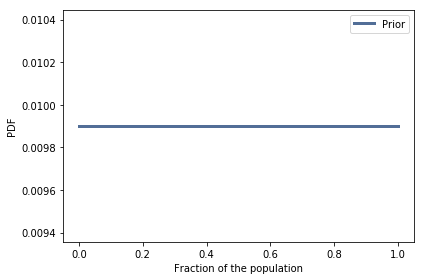

In [3]:
# Solution

prior = np.linspace(0, 1, 101)
suite = Social(prior)

thinkplot.Pdf(suite, label='Prior')
thinkplot.decorate(xlabel='Fraction of the population',
                   ylabel='PDF')

In [4]:
# Solution

for i in range(80):
    suite.Update('YES')
    
for i in range(20):
    suite.Update('NO')

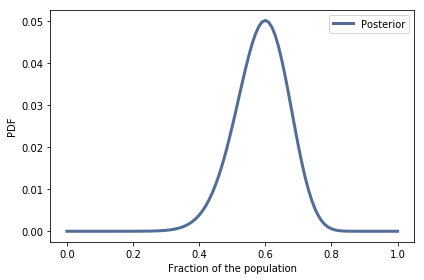

In [5]:
# Solution

thinkplot.Pdf(suite, label='Posterior')
thinkplot.decorate(xlabel='Fraction of the population',
                   ylabel='PDF')

In [6]:
# Solution

suite.Mean()

0.5882352942702531

In [7]:
suite.MAP()

0.6

For comparison, what would we think if we had been able to survey 100 people directly?

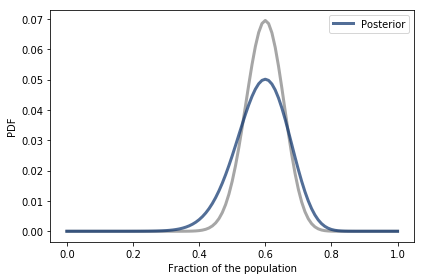

In [14]:
f = 2 * np.sqrt(2)

beta = Beta(1, 1)
beta.Update((60/f, 40/1.4))
thinkplot.Pdf(beta.MakePmf(), color='gray')


thinkplot.Pdf(suite, label='Posterior')
thinkplot.decorate(xlabel='Fraction of the population',
                   ylabel='PDF')